In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Load the data

In [2]:
# load data
train_df = pd.read_csv("/Users/will.hawthorn/Library/CloudStorage/OneDrive-ScienceandTechnologyFacilitiesCouncil/Uni/Year 3/xgdeeplearning/ASL/asl_data/sign_mnist_train.csv")
test_df = pd.read_csv("/Users/will.hawthorn/Library/CloudStorage/OneDrive-ScienceandTechnologyFacilitiesCouncil/Uni/Year 3/xgdeeplearning/ASL/asl_data/sign_mnist_test.csv")

In [3]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
# extract labels
y_train = train_df['label']
y_test = test_df['label']

In [5]:
y_train

0         3
1         6
2         2
3         2
4        13
         ..
27450    13
27451    23
27452    18
27453    17
27454    23
Name: label, Length: 27455, dtype: int64

In [6]:
# delete labels from train and test dfs
del train_df['label']
del test_df['label']

In [7]:
train_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [8]:
# extract the values from the csv files into an array
x_train = train_df.values
x_test = test_df.values

In [9]:
x_train

array([[107, 118, 127, ..., 204, 203, 202],
       [155, 157, 156, ..., 103, 135, 149],
       [187, 188, 188, ..., 195, 194, 195],
       ...,
       [174, 174, 174, ..., 202, 200, 200],
       [177, 181, 184, ...,  64,  87,  93],
       [179, 180, 180, ..., 205, 209, 215]])

In [10]:
# investigate the size of the dataset
x_train.shape

(27455, 784)

In [11]:
y_train.shape

(27455,)

In [12]:
x_test.shape

(7172, 784)

In [13]:
y_test.shape

(7172,)

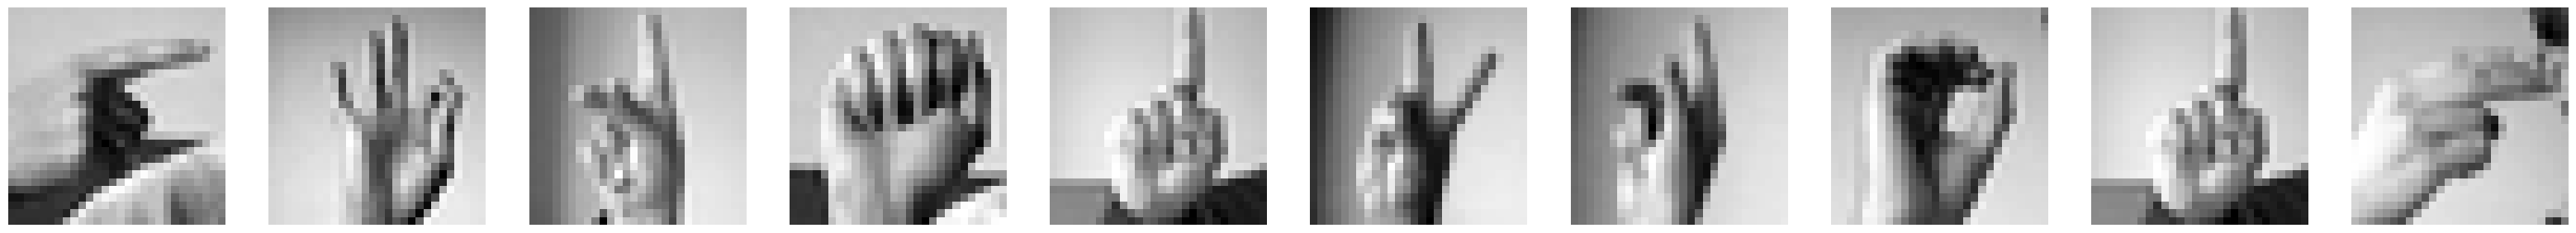

In [230]:
# Visualize the data
plt.figure(figsize=(40,40))

num_images = 10
for i in range(num_images):
    row = x_test[i]
    label = y_test[i]
    
    image = row.reshape(28,28)
    plt.subplot(1, num_images, i+1)
    # plt.title(label, fontdict={'fontsize': 30})
    plt.axis('off')
    plt.imshow(image, cmap='gray')


# Pre-processing

In [15]:
x_train.min()

0

In [16]:
x_train.max()

255

In [17]:
# normalise the data by dividing by 255
x_train = x_train / 255
x_test = x_test / 255


In [18]:
x_train.min()

0.0

In [19]:
x_train.max()

1.0

In [20]:
len(y_train.unique())

24

In [21]:
# keras expects an integer vector from 0 to number of classes
y_train = y_train - 1
y_test = y_test -1

In [22]:
if not y_train.shape[-1] == 24:
    y_train = keras.utils.to_categorical(y_train, 24)
    y_test = keras.utils.to_categorical(y_test, 24)

In [35]:
y_train.shape

(27455, 24)

# Dense Neural Network

In [23]:
# 32 neurons in the dense layers
model1 = Sequential()
model1.add(Dense(units = 32, activation="relu", input_shape=(784,)))
model1.add(Dense(units = 32, activation="relu"))
model1.add(Dense(units = 24, activation="softmax"))

In [24]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 24)                792       
                                                                 
Total params: 26,968
Trainable params: 26,968
Non-trainable params: 0
_________________________________________________________________


In [25]:
# compile using categorical crossentropy as the loss function as we want
# to fit into one of multiple categories
model1.compile(loss="categorical_crossentropy", metrics=["accuracy"])

In [27]:
model1_results = model1.fit(x_train, y_train, epochs=20, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2023-01-13 11:30:49.783636: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


789/858 [==========================>...] - ETA: 0s - loss: 2.4803 - accuracy: 0.2384WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x2912bfe20> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
858/858 [==============================] - 1s 665us/step - loss: 2.4380 - accuracy: 0.2490 - val_loss: 2.0581 - val_accuracy: 0.3600
Epoch 2/20
858/858 [===========

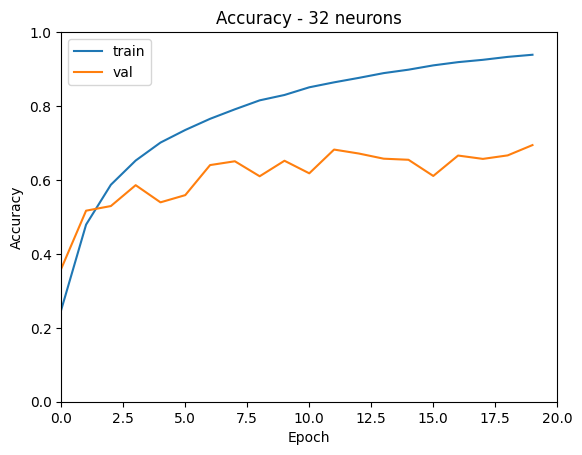

In [30]:
# plot model1 accuracy
plt.plot(model1_results.history['accuracy'])
plt.plot(model1_results.history['val_accuracy'])
plt.title('Accuracy - 32 neurons')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xlim([0, 20])
plt.ylim([0, 1])
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [32]:
# 64 neurons in the dense layer
model2 = Sequential()
model2.add(Dense(units = 64, activation="relu", input_shape=(784,)))
model2.add(Dense(units = 64, activation="relu"))
model2.add(Dense(units = 24, activation="softmax"))
model2.compile(loss="categorical_crossentropy", metrics=["accuracy"])
model2_results = model2.fit(x_train, y_train, epochs=20, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
775/858 [==========================>...] - ETA: 0s - loss: 2.3153 - accuracy: 0.2730WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x2906b2440> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full o

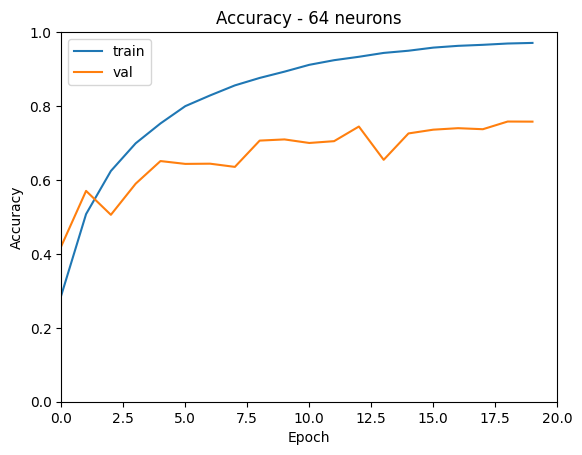

In [33]:
# plot model2 accuracy
plt.plot(model2_results.history['accuracy'])
plt.plot(model2_results.history['val_accuracy'])
plt.title('Accuracy - 64 neurons')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xlim([0, 20])
plt.ylim([0, 1])
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [36]:
# 128 neurons in the dense layer
model3 = Sequential()
model3.add(Dense(units = 128, activation="relu", input_shape=(784,)))
model3.add(Dense(units = 128, activation="relu"))
model3.add(Dense(units = 24, activation="softmax"))
model3.compile(loss="categorical_crossentropy", metrics=["accuracy"])
model3_results = model3.fit(x_train, y_train, epochs=20, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
853/858 [============================>.] - ETA: 0s - loss: 2.1086 - accuracy: 0.3402WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x285c25fc0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full o

In [37]:
# 256 neurons in the dense layer
model4 = Sequential()
model4.add(Dense(units = 256, activation="relu", input_shape=(784,)))
model4.add(Dense(units = 256, activation="relu"))
model4.add(Dense(units = 24, activation="softmax"))
model4.compile(loss="categorical_crossentropy", metrics=["accuracy"])
model4_results = model4.fit(x_train, y_train, epochs=20, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
851/858 [============================>.] - ETA: 0s - loss: 1.9864 - accuracy: 0.3676WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x1623a6170> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full o

In [38]:
# 512 neurons in the dense layer
model5 = Sequential()
model5.add(Dense(units = 512, activation="relu", input_shape=(784,)))
model5.add(Dense(units = 512, activation="relu"))
model5.add(Dense(units = 24, activation="softmax"))
model5.compile(loss="categorical_crossentropy", metrics=["accuracy"])
model5_results = model5.fit(x_train, y_train, epochs=20, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
843/858 [============================>.] - ETA: 0s - loss: 1.9247 - accuracy: 0.3858WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x28611a3b0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full o

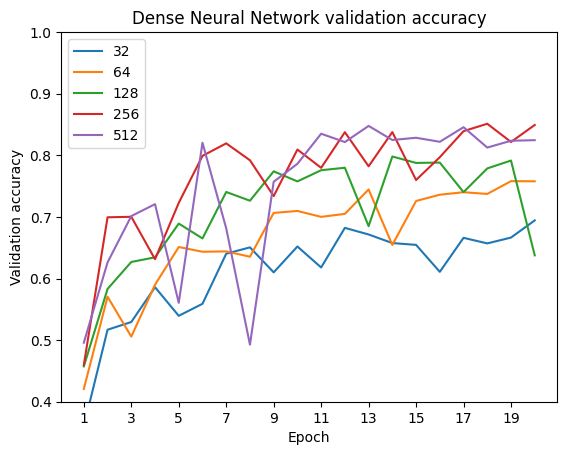

In [215]:
# DNN val accuracy
plt.plot(model1_results.history['val_accuracy'])
plt.plot(model2_results.history['val_accuracy'])
plt.plot(model3_results.history['val_accuracy'])
plt.plot(model4_results.history['val_accuracy'])
plt.plot(model5_results.history['val_accuracy'])
plt.title('Dense Neural Network validation accuracy')
plt.ylabel('Validation accuracy')
plt.xlabel('Epoch')
# plt.xlim([0, 20])
plt.xticks([0,2,4,6,8,10,12,14,16,18], labels=[1,3,5,7,9,11,13,15,17,19])
plt.ylim([0.4, 1])
plt.legend(['32', '64', '128', '256', '512'], loc='upper left')
plt.show()

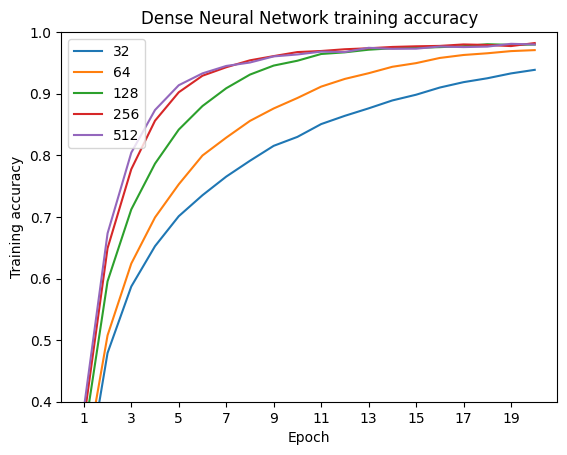

In [216]:
# DNN train accuracy
plt.plot(model1_results.history['accuracy'])
plt.plot(model2_results.history['accuracy'])
plt.plot(model3_results.history['accuracy'])
plt.plot(model4_results.history['accuracy'])
plt.plot(model5_results.history['accuracy'])
plt.title('Dense Neural Network training accuracy')
plt.ylabel('Training accuracy')
plt.xlabel('Epoch')
# plt.xlim([0, 20])
plt.xticks([0,2,4,6,8,10,12,14,16,18], labels=[1,3,5,7,9,11,13,15,17,19])
plt.ylim([0.4, 1])
plt.legend(['32', '64', '128', '256', '512'], loc='upper left')
plt.show()

# Convolutional Neural Network

In [50]:
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

In [51]:
# rehape the images so that the CNN can analyse the relationship between
# neighbouring pixels
x_train.shape

(27455, 784)

In [52]:
x_test.shape

(7172, 784)

In [54]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [55]:
x_test.shape

(7172, 28, 28, 1)

In [56]:
x_train.shape

(27455, 28, 28, 1)

# One convolutional layer

In [57]:
cnn_model1 = keras.models.Sequential([
    keras.layers.Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", input_shape=(28, 28, 1)),
    keras.layers.MaxPool2D((2, 2), strides=2, padding="same"),
    keras.layers.Flatten(),
    keras.layers.Dense(units=24, activation="softmax")
])

In [58]:
cnn_model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 75)        750       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 75)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 14700)             0         
                                                                 
 dense_15 (Dense)            (None, 24)                352824    
                                                                 
Total params: 353,574
Trainable params: 353,574
Non-trainable params: 0
_________________________________________________________________


In [72]:
cnn_model1.compile(loss="categorical_crossentropy", metrics=["accuracy"])
cnn_model1_results = cnn_model1.fit(x_train, y_train, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
852/858 [============================>.] - ETA: 0s - loss: 1.5626e-05 - accuracy: 1.0000WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x2ef139d80> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the fu

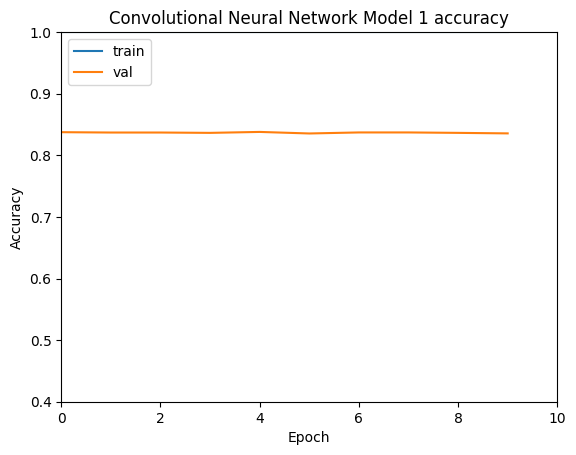

In [74]:
# plot CNN model1 accuracy
plt.plot(cnn_model1_results.history['accuracy'])
plt.plot(cnn_model1_results.history['val_accuracy'])
plt.title('Convolutional Neural Network Model 1 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xlim([0, 10])
plt.xticks([0,2,4,6,8,10])
plt.ylim([0.4, 1])
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# One convolutional layer with dropout

In [63]:
cnn_model2 = keras.models.Sequential([
    keras.layers.Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", input_shape=(28, 28, 1)),
    keras.layers.MaxPool2D((2, 2), strides=2, padding="same"),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=24, activation="softmax")
])

In [64]:
cnn_model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 75)        750       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 75)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 75)        0         
                                                                 
 flatten_1 (Flatten)         (None, 14700)             0         
                                                                 
 dense_16 (Dense)            (None, 24)                352824    
                                                                 
Total params: 353,574
Trainable params: 353,574
Non-trainable params: 0
________________________________________________

In [70]:
cnn_model2.compile(loss="categorical_crossentropy", metrics=["accuracy"])
cnn_model2_results = cnn_model2.fit(x_train, y_train, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
850/858 [============================>.] - ETA: 0s - loss: 6.4937e-05 - accuracy: 1.0000WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x292a0e8c0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the fu

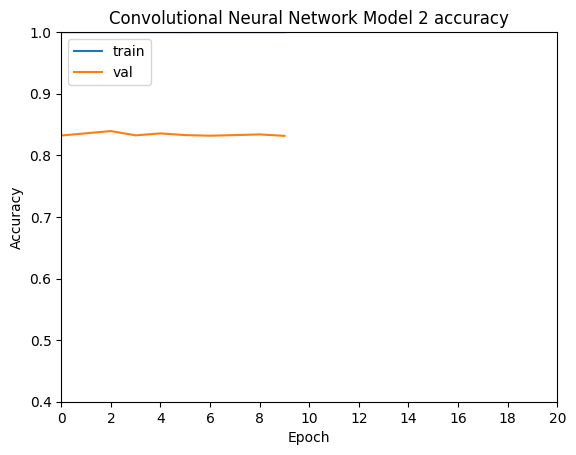

In [68]:
# plot CNN model2 accuracy
plt.plot(cnn_model2_results.history['accuracy'])
plt.plot(cnn_model2_results.history['val_accuracy'])
plt.title('Convolutional Neural Network Model 2 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xlim([0, 10])
plt.xticks([0,2,4,6,8,10,12,14,16,18,20])
plt.ylim([0.4, 1])
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# CNN model 3

In [94]:
cnn_model3 = keras.models.Sequential([
    keras.layers.Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", input_shape=(28, 28, 1)),
    keras.layers.MaxPool2D((2, 2), strides=2, padding="same"),
    keras.layers.Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"),
    keras.layers.MaxPool2D((2, 2), strides=2, padding="same"),
    keras.layers.Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"),
    keras.layers.MaxPool2D((2, 2), strides=2, padding="same"),
    keras.layers.Flatten(),
    keras.layers.Dense(units=512, activation="relu"),
    keras.layers.Dense(units=24, activation="softmax")
])

In [95]:
cnn_model3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 75)        750       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 75)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 50)         0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 7, 7, 25)          11275     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 4, 4, 25)        

In [97]:
cnn_model3.compile(loss="categorical_crossentropy", metrics=["accuracy"])

In [98]:
cnn_model3_results = cnn_model3.fit(x_train, y_train, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
857/858 [============================>.] - ETA: 0s - loss: 0.9073 - accuracy: 0.7191WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x160c23e20> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full o

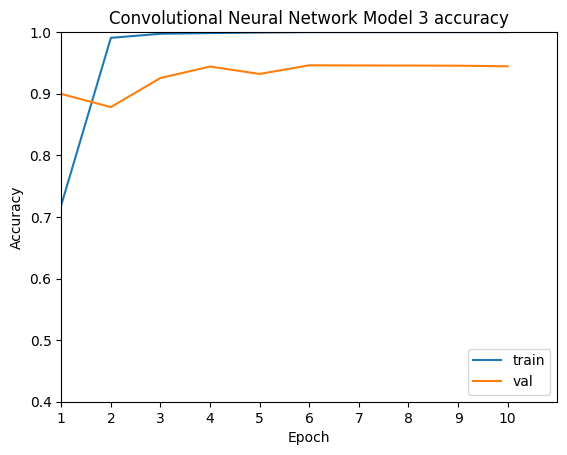

In [211]:
# Plot CNN model 3 results
plt.plot(cnn_model3_results.history['accuracy'])
plt.plot(cnn_model3_results.history['val_accuracy'])
plt.title('Convolutional Neural Network Model 3 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xlim([0, 10])
plt.xticks([0,1,2,3,4,5,6,7,8,9], labels=[1,2,3,4,5,6,7,8,9,10])
plt.ylim([0.4, 1])
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# CNN model 4

In [104]:
cnn_model4 = keras.models.Sequential([
    keras.layers.Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", input_shape=(28, 28, 1)),
    keras.layers.MaxPool2D((2, 2), strides=2, padding="same"),
    keras.layers.Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.MaxPool2D((2, 2), strides=2, padding="same"),
    keras.layers.Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.MaxPool2D((2, 2), strides=2, padding="same"),
    keras.layers.Flatten(),
    keras.layers.Dense(units=512, activation="relu"),
    keras.layers.Dense(units=24, activation="softmax")
])

In [105]:
cnn_model4.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 28, 28, 75)        750       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 75)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 14, 50)        33800     
                                                                 
 dropout_5 (Dropout)         (None, 14, 14, 50)        0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 7, 7, 50)         0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 7, 7, 25)        

In [106]:
cnn_model4.compile(loss="categorical_crossentropy", metrics=["accuracy"])

In [108]:
cnn_model4_results = cnn_model4.fit(x_train, y_train, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
858/858 [==============================] - 15s 18ms/step - loss: 0.0055 - accuracy: 0.9987 - val_loss: 0.2326 - val_accuracy: 0.9572
Epoch 2/10
858/858 [==============================] - 15s 17ms/step - loss: 0.0047 - accuracy: 0.9987 - val_loss: 0.2125 - val_accuracy: 0.9590
Epoch 3/10
858/858 [==============================] - 15s 17ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 0.2806 - val_accuracy: 0.9460
Epoch 4/10
858/858 [==============================] - 15s 17ms/step - loss: 0.0050 - accuracy: 0.9988 - val_loss: 0.1876 - val_accuracy: 0.9603
Epoch 5/10
858/858 [==============================] - 15s 18ms/step - loss: 0.0066 - accuracy: 0.9983 - val_loss: 0.2821 - val_accuracy: 0.9381
Epoch 6/10
858/858 [==============================] - 15s 18ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 0.2113 - val_accuracy: 0.9573
Epoch 7/10
858/858 [==============================] - 15s 17ms/step - loss: 0.0031 - accuracy: 0.9990 - val_loss: 0.2173 - val_accuracy:

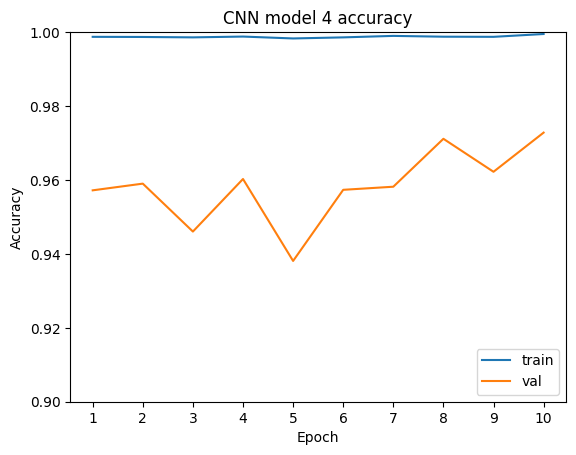

In [220]:
# plot CNN model 4 accuracy
plt.plot(cnn_model4_results.history['accuracy'])
plt.plot(cnn_model4_results.history['val_accuracy'])
plt.title('CNN model 4 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
# plt.xlim([0, 10])
plt.xticks([0,1,2,3,4,5,6,7,8,9], labels=[1,2,3,4,5,6,7,8,9,10])
plt.ylim([0.9, 1])
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# Data augmentation

In [86]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True, 
    vertical_flip=False,
)  

In [88]:
img_iter = datagen.flow(x_train, y_train, batch_size=32)

In [87]:
datagen.fit(x_train)

In [89]:
cnn_model1_aug_results = cnn_model1.fit(img_iter,
          epochs=10,
          steps_per_epoch=len(x_train)/32,
          validation_data=(x_test, y_test))

Epoch 1/10
857/857 [==============================] - 6s 6ms/step - loss: 2.2178 - accuracy: 0.5058 - val_loss: 0.6180 - val_accuracy: 0.8008
Epoch 2/10
857/857 [==============================] - 5s 6ms/step - loss: 1.1034 - accuracy: 0.6585 - val_loss: 0.5243 - val_accuracy: 0.8391
Epoch 3/10
857/857 [==============================] - 5s 6ms/step - loss: 0.9195 - accuracy: 0.7099 - val_loss: 0.5854 - val_accuracy: 0.7922
Epoch 4/10
857/857 [==============================] - 5s 6ms/step - loss: 0.8168 - accuracy: 0.7426 - val_loss: 0.4500 - val_accuracy: 0.8607
Epoch 5/10
857/857 [==============================] - 5s 6ms/step - loss: 0.7467 - accuracy: 0.7637 - val_loss: 0.3815 - val_accuracy: 0.8840
Epoch 6/10
857/857 [==============================] - 5s 6ms/step - loss: 0.6955 - accuracy: 0.7812 - val_loss: 0.4287 - val_accuracy: 0.8568
Epoch 7/10
857/857 [==============================] - 5s 6ms/step - loss: 0.6581 - accuracy: 0.7956 - val_loss: 0.3834 - val_accuracy: 0.8709
Epoch 

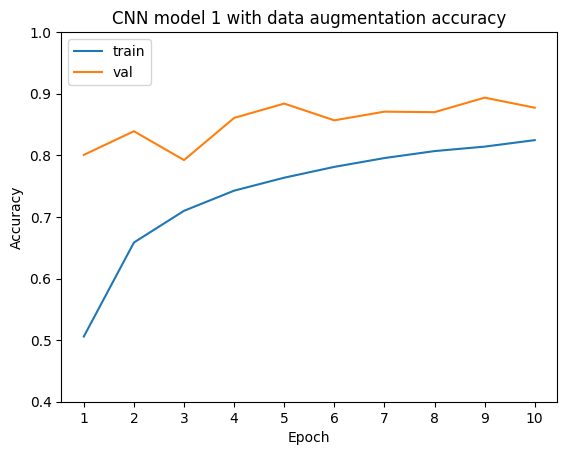

In [218]:
# Plot CNN model1 with data augmentation results
plt.plot(cnn_model1_aug_results.history['accuracy'])
plt.plot(cnn_model1_aug_results.history['val_accuracy'])
plt.title('CNN model 1 with data augmentation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
# plt.xlim([0, 10])
plt.xticks([0,1,2,3,4,5,6,7,8,9], labels=[1,2,3,4,5,6,7,8,9,10])
plt.ylim([0.4, 1])
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [112]:
# CNN model 4 with data augmentation
cnn_model4_aug_results = cnn_model4.fit(img_iter,
          epochs=10,
          steps_per_epoch=len(x_train)/32,
          validation_data=(x_test, y_test))

Epoch 1/10
857/857 [==============================] - 16s 18ms/step - loss: 1.0088 - accuracy: 0.7139 - val_loss: 0.1575 - val_accuracy: 0.9547
Epoch 2/10
857/857 [==============================] - 16s 18ms/step - loss: 0.3555 - accuracy: 0.8809 - val_loss: 0.0762 - val_accuracy: 0.9831
Epoch 3/10
857/857 [==============================] - 15s 18ms/step - loss: 0.2371 - accuracy: 0.9223 - val_loss: 0.0642 - val_accuracy: 0.9851
Epoch 4/10
857/857 [==============================] - 15s 18ms/step - loss: 0.1818 - accuracy: 0.9376 - val_loss: 0.0485 - val_accuracy: 0.9859
Epoch 5/10
857/857 [==============================] - 16s 18ms/step - loss: 0.1516 - accuracy: 0.9509 - val_loss: 0.0635 - val_accuracy: 0.9816
Epoch 6/10
857/857 [==============================] - 16s 18ms/step - loss: 0.1266 - accuracy: 0.9588 - val_loss: 0.0334 - val_accuracy: 0.9914
Epoch 7/10
857/857 [==============================] - 15s 18ms/step - loss: 0.1104 - accuracy: 0.9644 - val_loss: 0.0134 - val_accuracy:

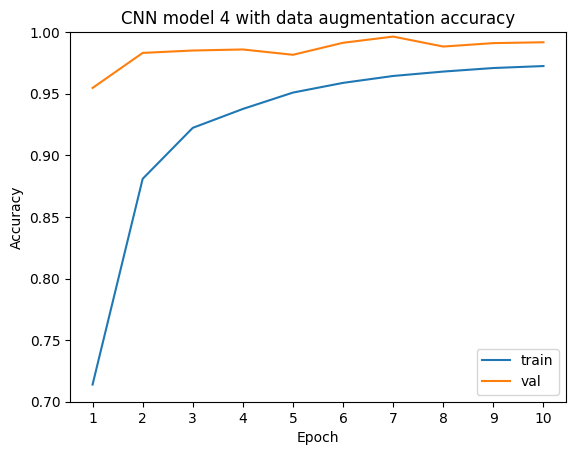

In [221]:
# Plot CNN model4 with data augmentation results
plt.plot(cnn_model4_aug_results.history['accuracy'])
plt.plot(cnn_model4_aug_results.history['val_accuracy'])
plt.title('CNN model 4 with data augmentation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
# plt.xlim([0, 10])
plt.xticks([0,1,2,3,4,5,6,7,8,9], labels=[1,2,3,4,5,6,7,8,9,10])
plt.ylim([0.7, 1])
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# Transfer learning - Xception

In [141]:
# Xception needs input with 3 channels and be at least 71x71
import tensorflow as tf
import numpy as np

In [168]:
# Add additional channels to grayscale images (convet from grayscale to RGB)
x_train_rgb = tf.image.grayscale_to_rgb(tf.convert_to_tensor(x_train)) # inconsistency with TensorFlow API - need to convery NumPy arrays to tensor
x_train_rgb.shape

TensorShape([27455, 28, 28, 3])

In [169]:
x_test_rgb = tf.image.grayscale_to_rgb(tf.convert_to_tensor(x_test))
x_test_rgb.shape

TensorShape([7172, 28, 28, 3])

In [171]:
# resize images keeping original aspect ratio the same to avoid distortion - minimum of 71x71
x_train_rgb_resize = tf.image.resize_with_pad(x_train_rgb, 84, 84)
x_train_rgb_resize.shape

TensorShape([27455, 84, 84, 3])

In [173]:
x_test_rgb_resize = tf.image.resize_with_pad(x_test_rgb, 84, 84)
x_test_rgb_resize.shape

TensorShape([7172, 84, 84, 3])

In [185]:
# Instantiate base model with pre-trained weights
from tensorflow.keras.applications import Xception

cnn_xception = Sequential()
cnn_xception.add(Xception(include_top=False, pooling='avg', weights="imagenet"))
cnn_xception.add(Dense(512), activation='relu')
cnn_xception.add(Dense(24, activation='softmax'))
cnn_xception.layers[0].trainable = False

In [174]:
# Freeze the base model
cnn_xception.trainable = False

In [187]:
# Test base model on un-augmented data
cnn_xception.compile(loss="categorical_crossentropy", metrics=["accuracy"])

In [188]:
cnn_xception_results = cnn_xception.fit(x_train_rgb_resize, y_train, epochs=10, verbose=1, validation_data=(x_test_rgb_resize, y_test))

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
858/858 [==============================] - ETA: 0s - loss: 0.2639 - accuracy: 0.9334WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x2ee7bdd80> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full o

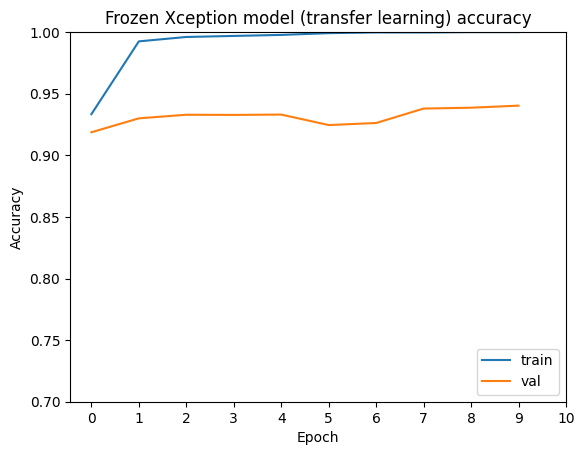

In [190]:
# Plot Xception model accuracy
plt.plot(cnn_xception_results.history['accuracy'])
plt.plot(cnn_xception_results.history['val_accuracy'])
plt.title('Frozen Xception model (transfer learning) accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
# plt.xlim([0, 10])
plt.xticks([0, 1,2,3,4,5,6,7,8,9,10])
plt.ylim([0.7, 1])
plt.legend(['train', 'val'], loc='lower right')
plt.show()

In [192]:
# Data augmentation for transfer learning
img_iter_aug = datagen.flow(x_train_rgb_resize, y_train, batch_size=32)

In [200]:
# Xception with dense and activation layers after
cnn_xception.trainable = True

cnn_xception = Sequential()
cnn_xception.add(Xception(include_top=False, pooling='avg', weights="imagenet"))
cnn_xception.add(Dense(512, activation='relu'))
cnn_xception.add(Dense(24, activation='softmax'))
cnn_xception.layers[0].trainable = False

# compile model
cnn_xception.compile(loss="categorical_crossentropy", metrics=["accuracy"])

# run model
cnn_xception_aug_results = cnn_xception.fit(img_iter_aug, epochs=10, steps_per_epoch=len(x_train_rgb_resize)/32, validation_data=(x_test_rgb_resize, y_test))

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
858/857 [==============================] - ETA: 0s - loss: 0.5552 - accuracy: 0.8231WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x32fdba0e0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full o

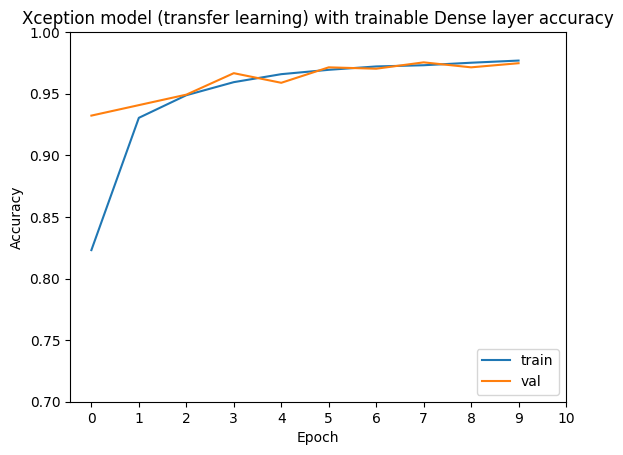

In [201]:
# Plot Xception results
plt.plot(cnn_xception_aug_results.history['accuracy'])
plt.plot(cnn_xception_aug_results.history['val_accuracy'])
plt.title('Xception model (transfer learning) with trainable Dense layer accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
# plt.xlim([0, 10])
plt.xticks([0, 1,2,3,4,5,6,7,8,9,10])
plt.ylim([0.7, 1])
plt.legend(['train', 'val'], loc='lower right')
plt.show()

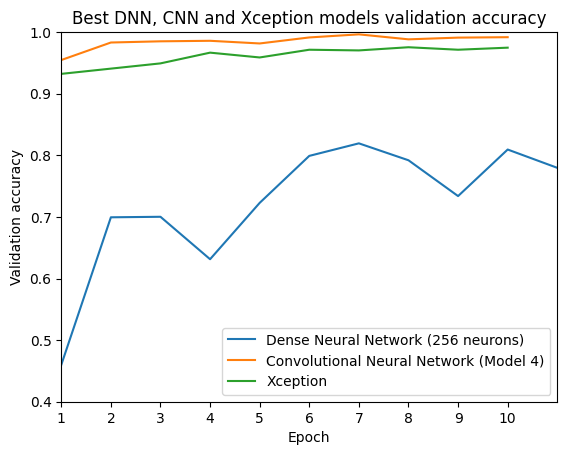

In [224]:
# Plot Best DNN (256 neurons), Best CNN (model 4) and Xception
plt.plot(model4_results.history['val_accuracy'])
plt.plot(cnn_model4_aug_results.history['val_accuracy'])
plt.plot(cnn_xception_aug_results.history['val_accuracy'])
plt.title('Best DNN, CNN and Xception models validation accuracy')
plt.ylabel('Validation accuracy')
plt.xlabel('Epoch')
plt.xlim([0, 10])
plt.xticks([0,1,2,3,4,5,6,7,8,9], labels=[1,2,3,4,5,6,7,8,9,10])
plt.ylim([0.4, 1])
plt.legend(['Dense Neural Network (256 neurons)', 'Convolutional Neural Network (Model 4)', 'Xception'], loc='lower right')
plt.show()